In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame 
import nltk

from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import pickle

import re
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error

df = pd.read_csv("data/Clothing_Shoes_Jewelry_Reviews.csv")

#delete unwanted column for the 1st time
if 'Unnamed: 0' in df.columns:
    del df['Unnamed: 0']
else:
    exit
    
    
count = df.groupby("asin", as_index=False).count()
mean = df.groupby("asin", as_index=False).mean()
dfMerged = pd.merge(df, count, how='right', on=['asin'])

dfMerged["totalReviewers"] = dfMerged["reviewerID_y"]
dfMerged["overallScore"] = dfMerged["overall_x"]
dfMerged["summaryReview"] = dfMerged["summary_x"]
dfNew = dfMerged[['asin','summaryReview','overallScore',"totalReviewers"]]


dfMerged = dfMerged.sort_values(by='totalReviewers', ascending=False)
dfCount = dfMerged[dfMerged.totalReviewers >= 50]


dfProductReview = df.groupby("asin", as_index=False).mean()
ProductReviewSummary = dfCount.groupby("asin")["summaryReview"].apply(list)
ProductReviewSummary = pd.DataFrame(ProductReviewSummary)
ProductReviewSummary.to_csv("ProductReviewSummary.csv")

df3 = pd.read_csv("ProductReviewSummary.csv")
df3 = pd.merge(df3, dfProductReview, on="asin", how='inner')

df3 = df3[['asin','summaryReview','overall']]

regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

df3["summaryClean"] = df3["summaryReview"].apply(cleanReviews)
df3 = df3.drop_duplicates(['overall'], keep='last')
df3 = df3.reset_index()

reviews = df3["summaryClean"] 
countVector = CountVectorizer(max_features = 300, stop_words='english') 
transformedReviews = countVector.fit_transform(reviews) 

dfReviews = DataFrame(transformedReviews.A, columns=countVector.get_feature_names())
dfReviews = dfReviews.astype(int)


dfReviews.to_csv("dfReviews.csv")

# df_meta=pd.read_csv('data/Meta_Clothing_Shoes_Jewelry_Reviews.csv')

# if 'Unnamed: 0' in df_meta.columns:
#     del df_meta['Unnamed: 0']
# else:
#     exit



    
    # First let's create a dataset called X

        

        



    


In [2]:
from nltk.corpus import stopwords
stop = stopwords.words("english")
english_stemmer=nltk.stem.SnowballStemmer('english')

In [6]:
X = np.array(dfReviews)

     #create train and test for 0.9
tpercent = 0.85
tsize = int(np.floor(tpercent * len(dfReviews)))

dfReviews_train = X[:tsize]
dfReviews_test = X[tsize:]
    #len of train and test
lentrain = len(dfReviews_train)
lentest = len(dfReviews_test)

neighbor = NearestNeighbors(n_neighbors=3, algorithm='brute').fit(dfReviews_train)

    # Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = neighbor.kneighbors(dfReviews_train)

input_asin_list=[]
first_asin=[]
second_asin=[]
for i in range(lentest):
    a = neighbor.kneighbors([dfReviews_test[i]])    
    related_product_list = a[1]    
    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)

    print ("Based on product reviews, for ", df3["asin"][lentrain + i] ," average rating is ",df3["overall"][lentrain + i])
    print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
    print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  B0093KV9LM  average rating is  3.830769230769231
The first similar product is  B004JLXNVO  average rating is  3.9047619047619047
The second similar product is  B008YU8VHC  average rating is  3.830188679245283
-----------------------------------------------------------
Based on product reviews, for  B00975PL9Y  average rating is  3.863013698630137
The first similar product is  B008X04NMK  average rating is  3.980392156862745
The second similar product is  B00865EFMK  average rating is  4.215686274509804
-----------------------------------------------------------
Based on product reviews, for  B009CCRK8C  average rating is  4.655172413793103
The first similar product is  B0020ML3F2  average rating is  4.1
The second similar product is  B000ARB1UQ  average rating is  4.385714285714286
-----------------------------------------------------------
Based on product reviews, for  B009D3IXGI  average rating is  4.2
The first similar product is  B007N99QHY  average 

In [5]:
X = np.array(dfReviews)

     #create train and test for 0.9
tpercent = 0.90
tsize = int(np.floor(tpercent * len(dfReviews)))

dfReviews_train = X[:tsize]
dfReviews_test = X[tsize:]
    #len of train and test
lentrain = len(dfReviews_train)
lentest = len(dfReviews_test)

neighbor = NearestNeighbors(n_neighbors=3, algorithm='auto').fit(dfReviews_train)

    # Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = neighbor.kneighbors(dfReviews_train)

input_asin_list=[]
first_asin=[]
second_asin=[]
for i in range(lentest):
    a = neighbor.kneighbors([dfReviews_test[i]])    
    related_product_list = a[1]    
    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)

    print ("Based on product reviews, for ", df3["asin"][lentrain + i] ," average rating is ",df3["overall"][lentrain + i])
    print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
    print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  B00ARGDD6K  average rating is  3.675675675675676
The first similar product is  B007ZYVFM6  average rating is  4.235294117647059
The second similar product is  B006UY80QG  average rating is  4.037735849056604
-----------------------------------------------------------
Based on product reviews, for  B00ARWNVG6  average rating is  4.171052631578948
The first similar product is  B007ZYVFM6  average rating is  4.235294117647059
The second similar product is  B006UY80QG  average rating is  4.037735849056604
-----------------------------------------------------------
Based on product reviews, for  B00AVPHH4Q  average rating is  4.245614035087719
The first similar product is  B00131FCB2  average rating is  4.30188679245283
The second similar product is  B000E69Z3S  average rating is  4.616666666666666
-----------------------------------------------------------
Based on product reviews, for  B00AW80P28  average rating is  4.116883116883117
The first similar produc

In [8]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great pri...,5.0,Great tutu- not cheaply made,1297468800,"02 12, 2011"
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5.0,Very Cute!!,1358553600,"01 19, 2013"
2,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]",What can I say... my daughters have it in oran...,5.0,I have buy more than one,1357257600,"01 4, 2013"
3,A8U3FAMSJVHS5,0000031887,Caromcg,"[0, 0]","We bought several tutus at once, and they are ...",5.0,"Adorable, Sturdy",1398556800,"04 27, 2014"
4,A3GEOILWLK86XM,0000031887,CJ,"[0, 0]",Thank you Halo Heaven great product for Little...,5.0,Grammy's Angels Love it,1394841600,"03 15, 2014"
5,A27UF1MSF3DB2,0000031887,"C-Lo ""Cynthia""","[0, 0]",I received this today and I'm not a fan of it ...,4.0,It's ok,1396224000,"03 31, 2014"
6,A16GFPNVF4Y816,0000031887,design maven,"[0, 0]",Bought this as a backup to the regular ballet ...,5.0,Great for dress-up and for ballet practice,1399075200,"05 3, 2014"
7,A2M2APVYIB2U6K,0000031887,Jamie P.,"[0, 0]",Great tutu for a great price. It isn't a &#34;...,5.0,Great value,1356220800,"12 23, 2012"
8,A1NJ71X3YPQNQ9,0000031887,JBerger,"[0, 0]","My daughter liked this, and it with her costum...",4.0,Good,1384041600,"11 10, 2013"
9,A3EERSWHAI6SO,0000031887,"Jeffrey Hollingshead ""Jillian hollingshead""","[7, 8]",For what I paid for two tutus is unbeatable an...,5.0,WOW !! ..is all I have to say!,1349568000,"10 7, 2012"


In [3]:
df_wc=df.drop(['helpful','reviewTime','reviewerName','unixReviewTime'],axis=1)

In [4]:
from nltk.corpus import stopwords
stop = stopwords.words("english")
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

df_wc.head()

,reviewerID,asin,reviewText,overall,summary
0,A1KLRMWW2FWPL4,0000031887,This is a great tutu and at a really great pri...,5.0,Great tutu- not cheaply made
1,A2G5TCU2WDFZ65,0000031887,I bought this for my 4 yr old daughter for dan...,5.0,Very Cute!!
2,A1RLQXYNCMWRWN,0000031887,What can I say... my daughters have it in oran...,5.0,I have buy more than one
3,A8U3FAMSJVHS5,0000031887,"We bought several tutus at once, and they are ...",5.0,"Adorable, Sturdy"
4,A3GEOILWLK86XM,0000031887,Thank you Halo Heaven great product for Little...,5.0,Grammy's Angels Love it


In [5]:
def data_clean( rev, remove_stopwords=True): 
    

    new_text = re.sub("[^a-zA-Z]"," ", rev)
   
    words = new_text.lower().split()
    
    if remove_stopwords:
        sts = set(stopwords.words("english"))
        words = [w for w in words if not w in sts]
    ary=[]
    eng_stemmer = english_stemmer 
    for word in words:
        ary.append(eng_stemmer.stem(word))

    
    return(ary)

In [17]:
"".join(data_clean(df_wc['reviewText'][0].lower()))

'greattuturealligreatpricelookcheapgladlookamazonfoundaffordtutumadepoor'

In [6]:
df_wc.dropna(inplace=True)

In [47]:
data_clean(df_wc['reviewText'][0])

['great',
 'tutu',
 'realli',
 'great',
 'price',
 'look',
 'cheap',
 'glad',
 'look',
 'amazon',
 'found',
 'afford',
 'tutu',
 'made',
 'poor']

In [ ]:
# wc_new=[]
# for i in df_wc['reviewText']:
#     wc_new.append("".join(data_clean(i)))
#     #i.lower()
# wc_new
# # print(str(df_wc['reviewText'][0]))

In [51]:
i


nan

In [31]:
df_wc['reviewText'].head()

0    This is a great tutu and at a really great pri...
1    I bought this for my 4 yr old daughter for dan...
2    What can I say... my daughters have it in oran...
3    We bought several tutus at once, and they are ...
4    Thank you Halo Heaven great product for Little...
Name: reviewText, dtype: object

In [7]:
clean_reviewData = []
for rev in df_wc['reviewText'].values:
    clean_reviewData.append("".join(data_clean(rev)))
    
# clean_summaryData = []
# for rev in df_wc['summary']:
#     clean_summaryData.append( " ".join(data_clean(rev)))

In [8]:
clean_summaryData = []
for rev in df_wc['summary']:
    clean_summaryData.append( " ".join(data_clean(rev)))

In [9]:
Most_used_Words_Review =pd.Series(' '.join(clean_reviewData).lower().split()).value_counts()[:20]
print (Most_used_Words_Review)

love            81
nice            29
great           20
good            20
cute            19
like            16
expect          13
comfort         13
pretti          11
ok              11
perfect          9
goodqualiti      9
fitexpect        8
beauti           7
comfi            7
small            6
big              6
lookgood         5
daughterlove     5
greatfit         5
dtype: int64


In [10]:
Most_used_Words_Summary = pd.Series(' '.join(clean_summaryData).lower().split()).value_counts()[:20]
print (Most_used_Words_Summary)

great      34210
love       24989
nice       19121
good       16287
shoe       14094
fit        13195
comfort    12879
cute       11857
perfect     8658
size        7772
look        7319
qualiti     6785
small       6618
beauti      6174
like        6084
price       5970
pretti      5338
watch       5190
comfi       5156
shirt       5077
dtype: int64


In [69]:
df_mu_summary=pd.DataFrame(Most_used_Words_Summary)

df_mu_reviews=pd.DataFrame(Most_used_Words_Review)

In [71]:
df_mu_summary=df_mu_summary.reset_index()
df_mu_summary


df_mu_reviews=df_mu_reviews.reset_index()
df_mu_reviews

,index,0
0,love,81
1,nice,29
2,great,20
3,good,20
4,cute,19
5,like,16
6,expect,13
7,comfort,13
8,pretti,11
9,ok,11


In [73]:
df_mu_summary = df_mu_summary.rename({'index': 'word', 0: 'frequency'}, axis=1)
df_mu_summary.sort_values('word',inplace=True)

df_mu_reviews = df_mu_reviews.rename({'index': 'word', 0: 'frequency'}, axis=1)
df_mu_reviews.sort_values('word',inplace=True)



,word,frequency
13,beauti,7
16,big,6
14,comfi,7
7,comfort,13
4,cute,19
18,daughterlove,5
6,expect,13
12,fitexpect,8
3,good,20
11,goodqualiti,9


In [63]:
x_axis=Most_used_Words_Summary.index
x_axis=df_mu_summary['word']
x_axis

y_axis=df_mu_summary['frequency']
y_axis

13     6174
18     5156
6     12879
7     11857
5     13195
3     16287
0     34210
14     6084
10     7319
1     24989
2     19121
8      8658
16     5338
15     5970
11     6785
19     5077
4     14094
9      7772
12     6618
17     5190
Name: frequency, dtype: int64

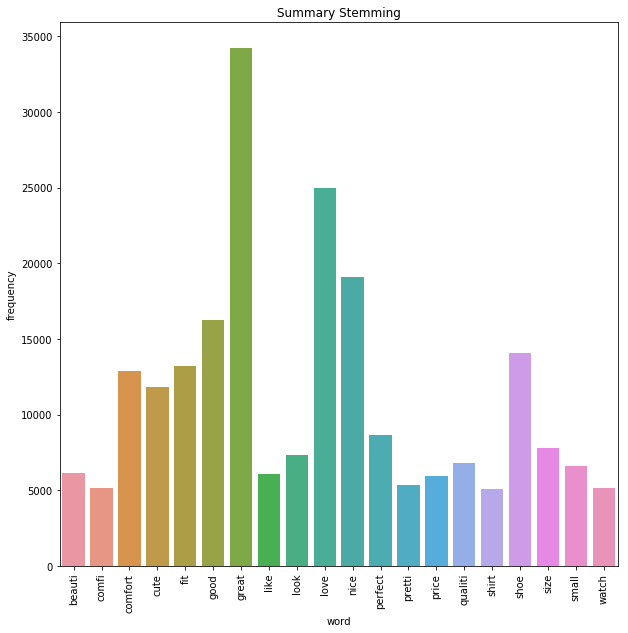

In [107]:
import seaborn as sns

#Create figure
fig=plt.figure(figsize = (10,10))

# Create scatterplot. alpha controls the opacity and s controls the size.
#ax = sns.scatterplot(x_axis,y_axis, alpha = 0.5,s=y_axis*0.1 )
ax=sns.barplot(x_axis,y_axis)
plt.title('Summary Stemming')
plt.xticks(rotation='vertical')
fig.savefig('plotSummary.png')

# ax.set_xlim(0,6)
# ax.set_ylim(-2, 18)

# #For each point, we add a text inside the bubble
# for line in range(0,df.shape[0]):
#      ax.text(df.x[line], df.y[line], df.group[line], horizontalalignment='center', size='medium', color='black', weight='semibold')
        
        

# plt.figure(figsize=(20, 10), dpi=80)
# plt.scatter(Most_used_Words_Summary.index,Most_used_Words_Summary.values,s=Most_used_Words_Summary.values*0.1)

In [74]:
x_axis_re=df_mu_reviews['word']
x_axis_re

y_axis_re=df_mu_reviews['frequency']
y_axis_re

13     7
16     6
14     7
7     13
4     19
18     5
6     13
12     8
3     20
11     9
2     20
19     5
5     16
17     5
0     81
1     29
9     11
10     9
8     11
15     6
Name: frequency, dtype: int64

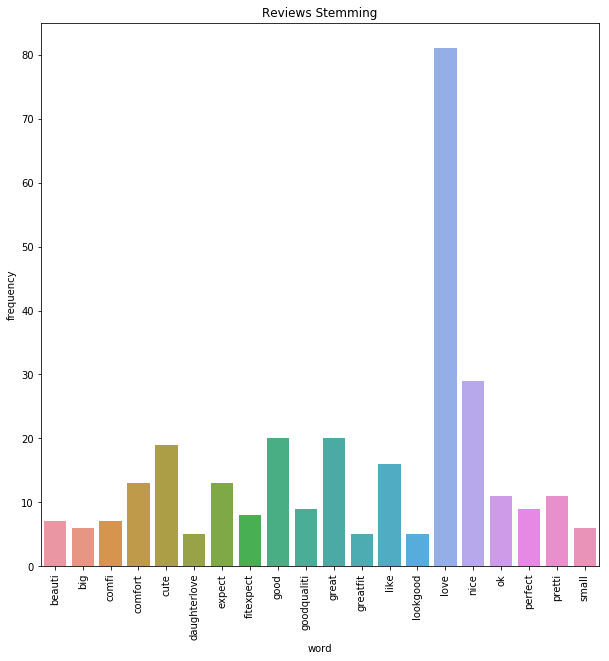

In [106]:
fig2=plt.figure(figsize = (10,10))

# Create scatterplot. alpha controls the opacity and s controls the size.
#ax = sns.scatterplot(x_axis,y_axis, alpha = 0.5,s=y_axis*0.1 )
ax = sns.barplot(x_axis_re,y_axis_re)
plt.title('Reviews Stemming')
plt.xticks(rotation='vertical')
fig2.savefig('plotReviewsNew.png')


In [94]:
fig.show()

C:\Users\rohin\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [95]:
ax